**Import libraries**

In [115]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import re


In [116]:
df=pd.read_csv(r"C:\Users\Barry\Desktop\projects\Entevuyuv\Uncleaned_DS_jobs.csv")

In [117]:
df1=df.copy()

In [118]:
df1.shape

(672, 14)

In [119]:
df1.drop(columns='index',inplace=True)

In [120]:
df1.head(2)

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1


In [121]:
df1.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          672 non-null    object
 1   Salary Estimate    672 non-null    object
 2   Job Description    672 non-null    object
 3   Company Name       672 non-null    object
 4   Location           672 non-null    object
 5   Headquarters       672 non-null    object
 6   Size               672 non-null    object
 7   Founded            672 non-null    int64 
 8   Type of ownership  672 non-null    object
 9   Industry           672 non-null    object
 10  Sector             672 non-null    object
 11  Revenue            672 non-null    object
 12  Competitors        672 non-null    object
dtypes: int64(1), object(12)
memory usage: 68.4+ KB


# Data Preprocessing

**Column job title**

In [123]:
df1['Job Title'].value_counts()

Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64

In [124]:
df1['Job Title']=df1['Job Title'].apply(lambda x: x.split(',')[0].strip())

**Column Salary Estimate**

In [125]:
df1['Salary Estimate'].head(2)

0    $137K-$171K (Glassdoor est.)
1    $137K-$171K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [126]:
df1['Salary Estimate']=df1['Salary Estimate'].apply(lambda x: x.split('(')[0].strip())
df1['Salary Estimate']=df1['Salary Estimate'].apply(lambda x: x.replace('$',""))
df1['Salary Estimate']=df1['Salary Estimate'].apply(lambda x: x.replace('K',""))

#feature engineering
df1['Min Salary']=df1['Salary Estimate'].apply(lambda x: x.split('-')[0].strip())
df1['Max Salary']=df1['Salary Estimate'].apply(lambda x: x.split('-')[1].strip())
 
#converting to int data type
df1['Min Salary']=df1['Min Salary'].astype('int16')
df1['Max Salary']=df1['Max Salary'].astype('int16')

**Column Location and Headquarter**

In [127]:
df1['Headquarters'].value_counts()

New York, NY         33
-1                   31
San Francisco, CA    31
Chicago, IL          23
Boston, MA           19
                     ..
Irving, TX            1
Scottsdale, AZ        1
Greensboro, NC        1
Newark, CA            1
Fort Lee, NJ          1
Name: Headquarters, Length: 229, dtype: int64

In [128]:
#imputing currupt data like '-1'

df1['Location']=df1['Location'].apply(lambda x: x.split(',')[0].strip())       
df1['Headquarters']=df1['Headquarters'].apply(lambda x: x.split(',')[0].strip())
df1.loc[df1['Headquarters']=='-1','Headquarters']='New York'

In [129]:
df1['Headquarters'].value_counts()

New York         66
San Francisco    31
Chicago          23
Cambridge        20
Boston           19
                 ..
Beavercreek       1
Livermore         1
Philadelphia      1
Danvers           1
Fort Lee          1
Name: Headquarters, Length: 221, dtype: int64

**Column size**

In [130]:
df1['Size'].value_counts()

51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64

In [131]:
#imputing unkwon and -1 currupt values 
#then applying some preprocessing techniques devide minimum and maximum salary
df1.loc[df['Size']=='Unknown','Size']='51-200'
df1.loc[df1['Size']== '-1','Size']='51 to 200 employees'
df1['Size']=df1['Size'].apply(lambda x: x.split('employees')[0].strip())
df1['Size']=df1['Size'].apply(lambda x: x.replace(' ',''))
df1['Size']=df1['Size'].apply(lambda x: x.replace('to','-'))
df1['Size']=df1['Size'].apply(lambda x: x.replace('+',''))

#feature engineering
# creating new featues 
df1['Min Size'] = df1['Size'].apply(lambda x: x.split('-')[0].strip() if '-' in x else x.strip())
df1['Max Size'] = df1['Size'].apply(lambda x: x.split('-')[1].strip() if '-' in x else x.strip())

# Converting to int data type
df1['Min Size'] = df1['Min Size'].astype('int16')
df1['Max Size'] = df1['Max Size'].astype('int16')

**column Founded**

In [132]:
df1['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [133]:
median=df1['Founded'].median()
df1.loc[df1['Founded']== -1,'Founded']=median

In [134]:
df1['Founded'] = pd.to_datetime(df1['Founded'],format='%Y').dt.year# Convert the 'Date' column to datetime data type

**Column type of ownership**

In [135]:
df1['Type of ownership'].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

In [136]:
df1.loc[df1['Type of ownership']=='-1','Type of ownership']='Company - Private'
df1['Type of ownership']=df1['Type of ownership'].apply(lambda x: x.replace('/','or'))
df1['Type of ownership']=df1['Type of ownership'].apply(lambda x: x.replace('-',''))

**Column Industry and sector**

In [137]:
df1.loc[df1['Industry']== '-1','Industry']='Biotech & Pharmaceuticals'

In [138]:
df1['Sector'].value_counts()
df1.loc[df1['Sector']== '-1','Sector']='Information Technology'

**column revenue**

In [139]:
df1['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)

In [140]:
df1.loc[df1['Revenue']=='Unknown / Non-Applicable','Revenue'] = '$100 to $500 million (USD)'
df1.loc[df1['Revenue']== '-1','Revenue'] = '$100 to $500 million (USD)'
df1['Revenue']=df1['Revenue'].apply(lambda x: x.replace(' ',''))
df1['Revenue']=df1['Revenue'].apply(lambda x: x.replace('to','-'))
df1['Revenue']=df1['Revenue'].apply(lambda x: x.replace('+',''))
df1['Revenue']=df1['Revenue'].apply(lambda x: x.replace('$',''))


In [142]:
df1['Revenue'].value_counts()

100-500million(USD)         334
10billion(USD)               63
2-5billion(USD)              45
10-25million(USD)            41
1-2billion(USD)              36
25-50million(USD)            36
50-100million(USD)           31
1-5million(USD)              31
500million-1billion(USD)     19
5-10million(USD)             14
Lessthan1million(USD)        14
5-10billion(USD)              8
Name: Revenue, dtype: int64

In [144]:
df1['Revenue'] = df1['Revenue'].astype(str).str.replace(r"[^\d-]", "")

In [145]:
df1['Revenue']

0      100-500
1          1-2
2      100-500
3      100-500
4      100-500
        ...   
667    100-500
668    100-500
669    100-500
670        1-5
671        1-2
Name: Revenue, Length: 672, dtype: object

**Column company name**

In [146]:
df1['company name']=df1['Company Name'].apply(lambda x: x.split('\n')[0].strip() if '\n' in x else x.strip())
df1['company rating']=df1['Company Name'].apply(lambda x: x.split('\n')[1].strip() if '\n' in x else 0.0)

In [147]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Min Salary',
       'Max Salary', 'Min Size', 'Max Size', 'company name', 'company rating'],
      dtype='object')

**Droping unwanted columns**

In [148]:
df1.drop(columns=['Salary Estimate','Company Name','Size','Competitors'],inplace=True)

In [149]:
df1.head(2)

,Job Title,Job Description,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary,Max Salary,Min Size,Max Size,company name,company rating
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,New York,New York,1993,Nonprofit Organization,Insurance Carriers,Insurance,100-500,137,171,1001,5000,Healthfirst,3.1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",Chantilly,Herndon,1968,Company Public,Research & Development,Business Services,1-2,137,171,5001,10000,ManTech,4.2


In [150]:
df1.isnull().sum()

Job Title            0
Job Description      0
Location             0
Headquarters         0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Min Salary           0
Max Salary           0
Min Size             0
Max Size             0
company name         0
company rating       0
dtype: int64

In [151]:

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z1-9]', ' ', text.lower())
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Get the year and experience keywords
    year_keywords = ['year', 'years']
    experience_keywords = ['experience', 'experienced']
    year = None
    experience = None
    
    # Find the year and experience information in the tokens
    for i in range(len(lemmatized_tokens)):
        if lemmatized_tokens[i] in year_keywords and i > 0 and lemmatized_tokens[i-1].isdigit():
            year = int(lemmatized_tokens[i-1])
        if lemmatized_tokens[i] in experience_keywords and i > 0 and lemmatized_tokens[i-1].isdigit():
            experience = int(lemmatized_tokens[i-1])
    
    # Get the most frequent words as trending skills
    fdist = FreqDist(lemmatized_tokens)
    trending_skills = [token for token, count in fdist.most_common(5)]
    
    return year, experience, trending_skills

# Example DataFrame
text_1 =df1['Job Description']

# Apply the preprocessing function to the 'Job Description' column
df2= text_1.apply(preprocess_text).apply(pd.Series)

# Print the DataFrame with the extracted information
print(df2)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Barry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


        0   1                                                  2
0     NaN NaN   [data, business, statistical, model, healthcare]
1    15.0 NaN     [mantech, data, experience, veteran, analytic]
2     NaN NaN                                [de, et, le, e, en]
3     NaN NaN  [data, learning, machine, manufacturing, exper...
4     NaN NaN  [data, marketing, methodology, client, statist...
..    ...  ..                                                ...
667   2.0 NaN      [data, business, science, scientist, company]
668   NaN NaN       [model, analytic, within, develop, analysis]
669   3.0 NaN    [data, business, experience, cancer, scientist]
670   5.0 NaN    [data, experience, model, recommendation, text]
671   4.0 NaN         [data, analytics, business, inc, customer]

[672 rows x 3 columns]


In [152]:
df2=pd.DataFrame(df2.values,columns=['year','experiance','skills'])

In [153]:
df2['year']=df2['year'].fillna(0)

In [154]:
df2.drop(columns='experiance',inplace=True)

In [155]:
#Merging df1 and df2 
final_df=pd.concat([df1,df2],axis=1)

In [156]:
final_df.head()

,Job Title,Job Description,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary,Max Salary,Min Size,Max Size,company name,company rating,year,skills
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,New York,New York,1993,Nonprofit Organization,Insurance Carriers,Insurance,100-500,137,171,1001,5000,Healthfirst,3.1,0.0,"[data, business, statistical, model, healthcare]"
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",Chantilly,Herndon,1968,Company Public,Research & Development,Business Services,1-2,137,171,5001,10000,ManTech,4.2,15.0,"[mantech, data, experience, veteran, analytic]"
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,Boston,Boston,1981,Private Practice or Firm,Consulting,Business Services,100-500,137,171,1001,5000,Analysis Group,3.8,0.0,"[de, et, le, e, en]"
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,Newton,Bad Ragaz,2000,Company Public,Electrical & Electronic Manufacturing,Manufacturing,100-500,137,171,501,1000,INFICON,3.5,0.0,"[data, learning, machine, manufacturing, exper..."
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,New York,New York,1998,Company Private,Advertising & Marketing,Business Services,100-500,137,171,51,200,Affinity Solutions,2.9,0.0,"[data, marketing, methodology, client, statist..."


# EDA

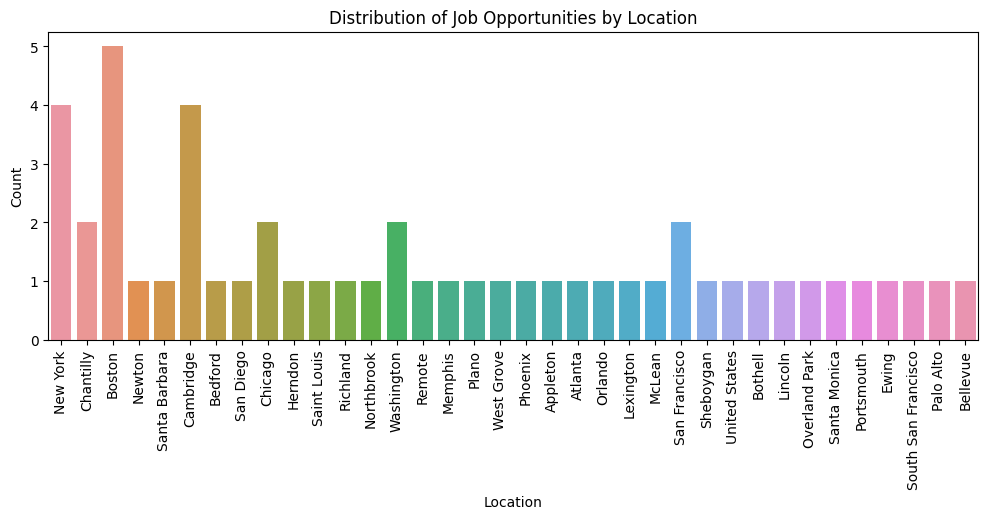

In [157]:
# Plot the distribution of job opportunities by location
plt.figure(figsize=(12,4))
sns.countplot(data=final_df.head(50), x='Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Job Opportunities by Location')
plt.xticks(rotation=90)
plt.show()


**Determine the min and max average salary range for different job positions across the
industries and how the salary changes from region to region**

In [158]:
min_avg_salary = final_df.groupby(['Job Title', 'Industry', 'Location'])['Min Salary'].mean().reset_index()
min_avg_salary = min_avg_salary.sort_values('Min Salary',ascending=False)

In [159]:
min_avg_salary=min_avg_salary.head(30)

In [160]:
max_avg_salary = final_df.groupby(['Job Title', 'Industry', 'Location'])['Max Salary'].mean().reset_index()
max_avg_salary

,Job Title,Industry,Location,Max Salary
0,(Sr.) Data Scientist -,Banks & Credit Unions,Utah,136.000000
1,AI Data Scientist,Federal Agencies,McLean,109.000000
2,AI Ops Data Scientist,Biotech & Pharmaceuticals,Gaithersburg,125.666667
3,AI/ML - Machine Learning Scientist,Computer Hardware & Software,Santa Clara,155.000000
4,Analytics - Business Assurance Data Analyst,Lending,Cedar Rapids,173.333333
...,...,...,...,...
441,Statistical Scientist,Biotech & Pharmaceuticals,South San Francisco,97.000000
442,Tableau Data Engineer 20-0117,Enterprise Software & Network Solutions,Chicago,109.000000
443,VP,Research & Development,New York,101.500000
444,Vice President,Biotech & Pharmaceuticals,South San Francisco,158.000000


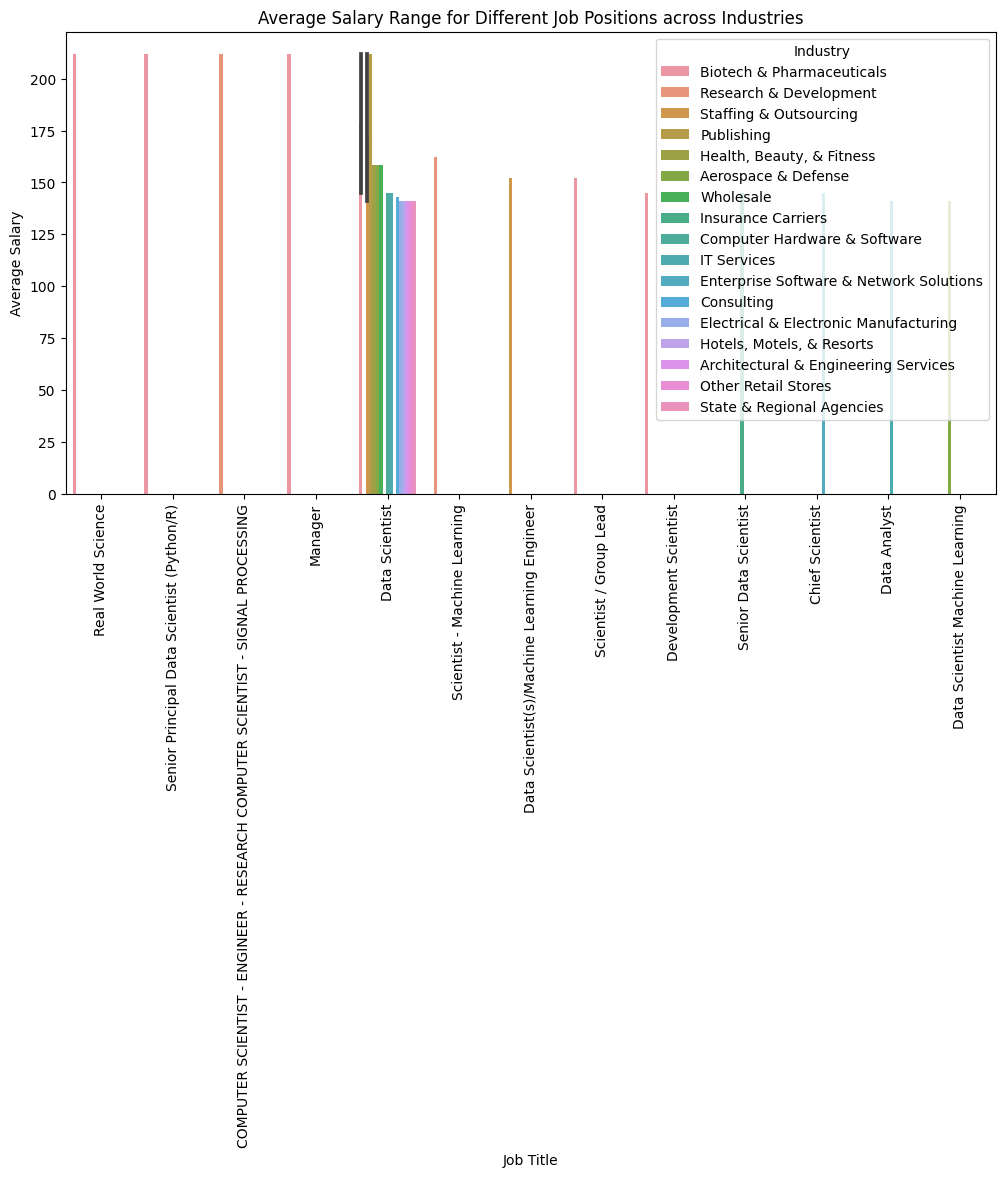

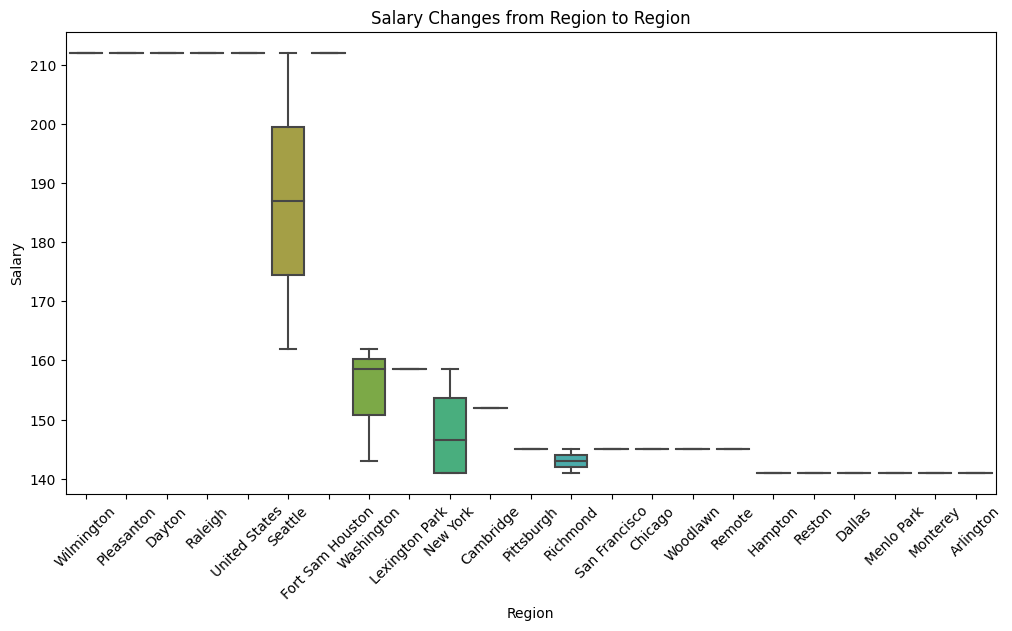

In [161]:
# Plot the average salary range for different job positions across industries
plt.figure(figsize=(12, 6))
sns.barplot(data=min_avg_salary, x='Job Title', y='Min Salary', hue='Industry')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary Range for Different Job Positions across Industries')
plt.xticks(rotation=90)
plt.legend(title='Industry')
plt.show()

# Plot the salary changes from region to region
plt.figure(figsize=(12, 6))
sns.boxplot(data=min_avg_salary, x='Location', y='Min Salary')
plt.xlabel('Region')
plt.ylabel('Salary')
plt.title('Salary Changes from Region to Region')
plt.xticks(rotation=45)
plt.show()

**Determine the most in-demand skills across industries**

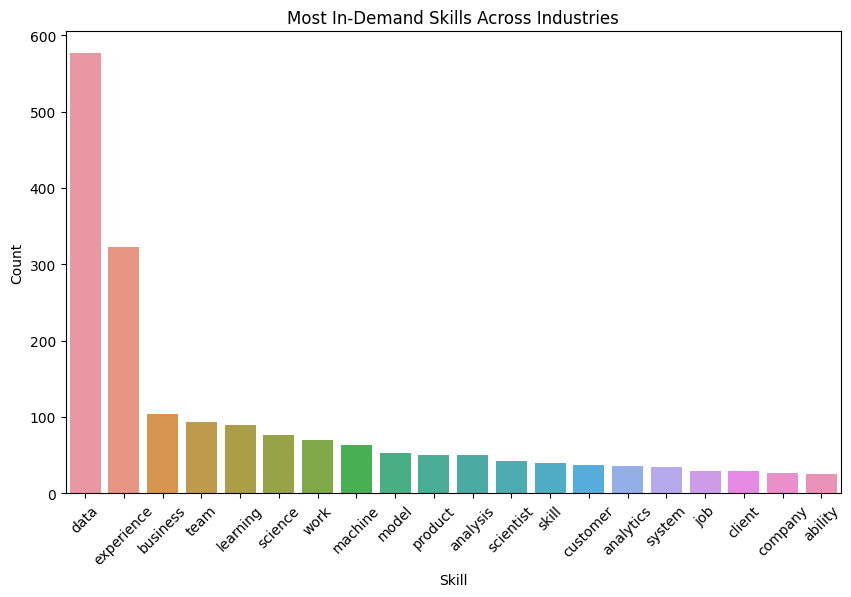

In [162]:
# Extract all skills from the 'Trending Skills' column
skills = [x for _ in final_df['skills'] for x in _]
skill_counts = pd.Series(skills).value_counts().head(20)

# Plot the most in-demand skills across industries
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.index, y=skill_counts.values)
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Most In-Demand Skills Across Industries')
plt.xticks(rotation=45)
plt.show()

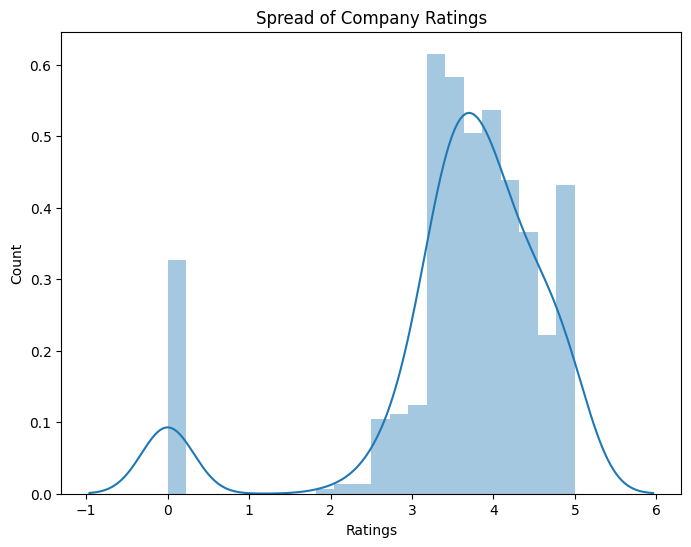

In [163]:
# Plot the bar plot of company ratings
plt.figure(figsize=(8, 6))
sns.distplot(final_df['company rating'])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Spread of Company Ratings')
plt.show()

In [164]:
# Plot the bar plot of distribution of the ownership of companies


In [165]:
# Different kind of firms
final_df['Max Size'].value_counts()

200      179
10000    141
5000     104
50        86
500       85
1000      77
Name: Max Size, dtype: int64

In [166]:
# code for finding number of firms based on there sizes
small=0
medium=0
big=0
for i in final_df['Max Size']:
    if i <100:
        small+=1
    if i >100 and i <1000:
        medium+=1
    if i > 1000:
        big+=1
print(f"small:{small},big:{big},medium:{medium}")

small:86,big:245,medium:264


In [167]:
firm=pd.DataFrame({'size':['small','medium','big'],'count':[small,medium,big]})

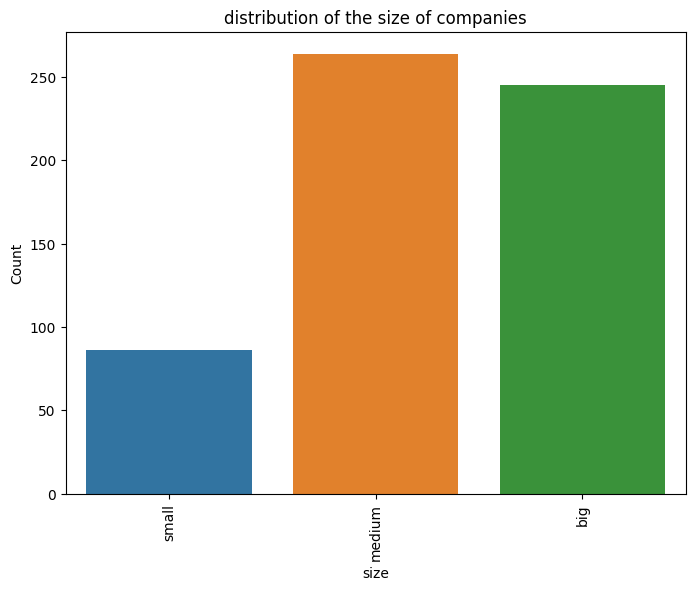

In [168]:
plt.figure(figsize=(8, 6))
sns.barplot(x=firm['size'],y=firm['count'])
plt.xlabel('size')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('distribution of the size of companies')
plt.show()

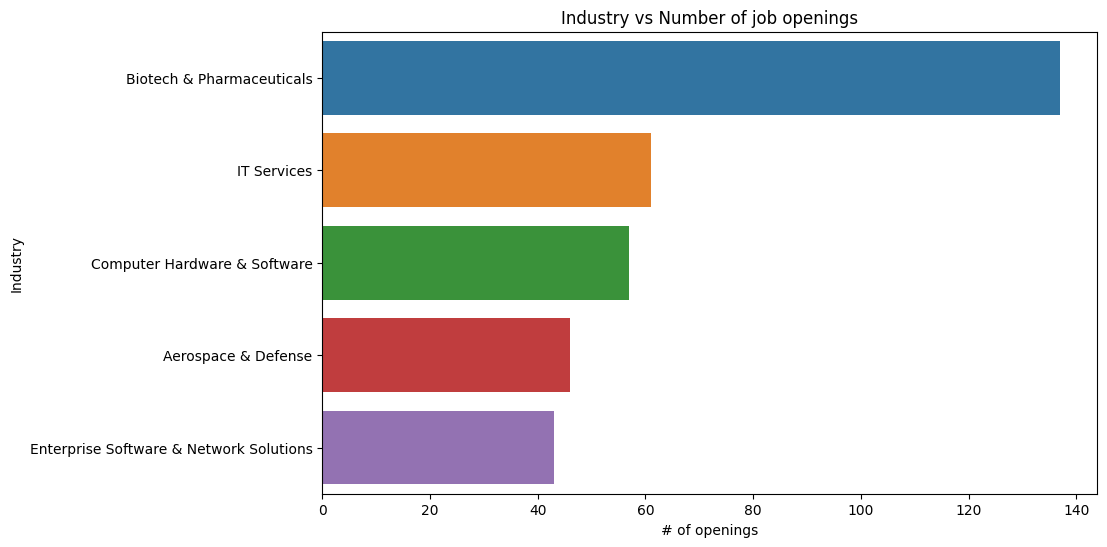

In [169]:
#Identify the top five industries with the highest number of job openings
top_five_ind=final_df.groupby('Industry')['Job Title'].count()
top_five=top_five_ind.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_five.values, y=top_five.index)
plt.xlabel('# of openings')
plt.ylabel('Industry')
plt.title('Industry vs Number of job openings')
plt.show()

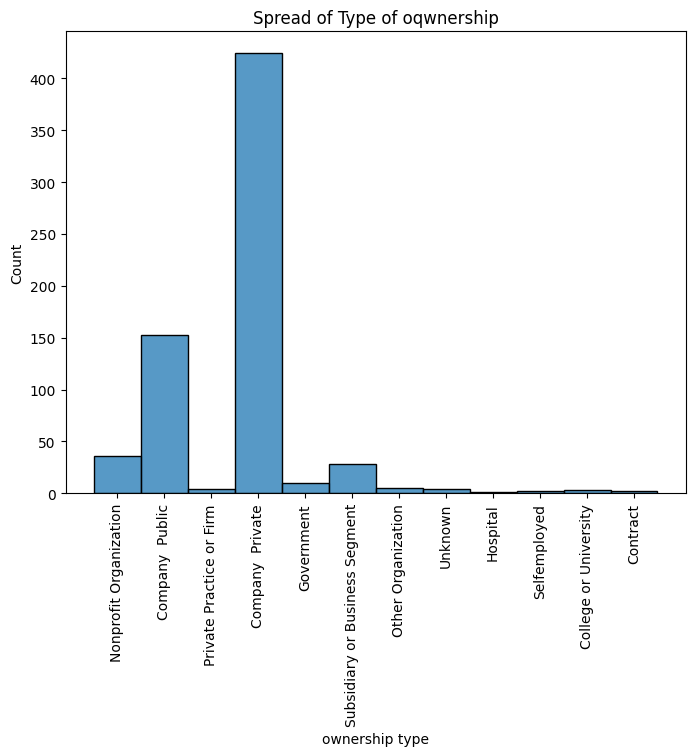

In [170]:
#Analyze the distribution of the ownership of companies
plt.figure(figsize=(8, 6))
sns.histplot(final_df['Type of ownership'])
plt.xlabel('ownership type')
plt.ylabel('Count')
plt.title('Spread of Type of oqwnership')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Year founded vs max salary paying'}, xlabel='Founded', ylabel='Max Salary'>

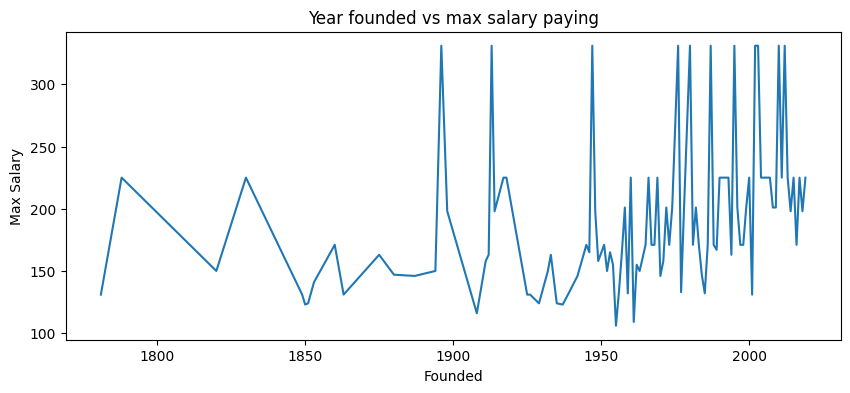

In [174]:
#find out companies which are founded earlier or later is paying more salary. 
plt.figure(figsize=(10,4))
salary_pay=final_df.groupby('Founded')['Max Salary'].max()
plt.title("Year founded vs max salary paying")
sns.lineplot(salary_pay)